# ChemBERTa-2 PCA analysis of the embeddings

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from ChemLLM_Dimensionality_reduction_Classification import *

## Predictions dataframes

In [ ]:
def classify_predictions(predictions_df):
    for i in range(len(predictions_df)):
        y_true = predictions_df.loc[i, 'labels']
        y_pred = predictions_df.loc[i, 'y_pred']
        if y_true == y_pred == 1:
            predictions_df.loc[i, 'cf'] = 'tp'
            predictions_df.loc[i, 'cf_color'] = 3
        elif y_true == y_pred == 0:
            predictions_df.loc[i, 'cf'] = 'tn'
            predictions_df.loc[i, 'cf_color'] = 0
        elif y_true == 0 and y_pred == 1:
            predictions_df.loc[i, 'cf'] = 'fp'
            predictions_df.loc[i, 'cf_color'] = 2
        else:
            predictions_df.loc[i, 'cf'] = 'fn'
            predictions_df.loc[i, 'cf_color'] = 1

    return predictions_df

In [4]:
model_24_pred_df_path = "/mnt/c/Users/pc/OneDrive/Dokumente/PYTHON_PROJECTS/MEDICAL PROJECTS/ChemLLM/model_24_predictions_df.csv"
model_36_pred_df_path = "/mnt/c/Users/pc/OneDrive/Dokumente/PYTHON_PROJECTS/MEDICAL PROJECTS/ChemLLM/model_36_predictions_df.csv"

model_24_pred_df = pd.read_csv(model_24_pred_df_path, index_col=0)
model_36_pred_df = pd.read_csv(model_36_pred_df_path, index_col=0)

model_24_pred_df = classify_predictions(model_24_pred_df)
model_36_pred_df = classify_predictions(model_36_pred_df)

print(model_24_pred_df.shape)
print(model_36_pred_df.shape)
model_24_pred_df.head()

(4113, 7)
(4113, 7)


,text,labels,class_0_probability,class_1_probability,y_pred,cf,cf_color
0,CN=C1OC2(c3ccccc3)C3=C(OC(=NC)N2C)C(=O)OC3(c2c...,0,9.044940,4.453197,0,tn,0.0
1,c1ccc2c(c1)[nH]c1c3ccccc3sc21,0,9.071786,4.316063,0,tn,0.0
2,CN1C(=O)N(C)P(=O)(c2ccccc2)P1c1ccccc1,0,8.931075,4.468280,0,tn,0.0
3,O=C(c1ccccc1)N1OCCCc2ccccc21,0,9.078395,4.406790,0,tn,0.0
4,COC(=O)c1c2c(cc3nc4ccccc4nc13)OCO2,0,8.966545,4.409793,0,tn,0.0


In [5]:
model_24_pred_df.to_csv(model_24_pred_df_path)
model_36_pred_df.to_csv(model_36_pred_df_path)

## Model embeddings: load and pre-process

In [6]:
embeddings_folder = '/mnt/c/Users/pc/OneDrive/Dokumente/PYTHON_PROJECTS/MEDICAL PROJECTS/ChemLLM'

model_24_before_path = os.path.join(embeddings_folder, 'model_24_test_embeddings_before.npy')
model_24_after_path = os.path.join(embeddings_folder, 'model_24_test_embeddings_after.npy')
model_24_before = np.load(model_24_before_path)
model_24_after = np.load(model_24_after_path)


model_36_before_path = os.path.join(embeddings_folder, 'model_36_test_embeddings_before.npy')
model_36_after_path = os.path.join(embeddings_folder, 'model_36_test_embeddings_after.npy')
model_36_before = np.load(model_36_before_path)
model_36_after = np.load(model_36_after_path)

print(model_24_before.shape)
print(model_36_before.shape)

print(model_24_after.shape)
print(model_36_after.shape)

(4113, 384)
(4113, 384)
(4113, 384)
(4113, 384)


In [7]:
def make_embeddings_df(embeddings):
    df = pd.DataFrame(data=embeddings)
    features = ["Embedd_" + str(i+1) for i in range(df.shape[1])]
    df.columns = features
    return df

model_24_before_embed_df = make_embeddings_df(model_24_before)
model_24_after_embed_df = make_embeddings_df(model_24_after)
features = model_24_before_embed_df.columns

model_24_before_embed_df['Category'] = model_24_pred_df['labels']
model_24_after_embed_df['Category'] = model_24_pred_df['labels']

model_36_before_embed_df = make_embeddings_df(model_36_before)
model_36_after_embed_df = make_embeddings_df(model_36_after)
model_36_before_embed_df['Category'] = model_36_pred_df['labels']
model_36_after_embed_df['Category'] = model_36_pred_df['labels']

print(model_36_before_embed_df.shape)
model_36_before_embed_df.head()

(4113, 385)


,Embedd_1,Embedd_2,Embedd_3,Embedd_4,Embedd_5,Embedd_6,Embedd_7,Embedd_8,Embedd_9,Embedd_10,...,Embedd_376,Embedd_377,Embedd_378,Embedd_379,Embedd_380,Embedd_381,Embedd_382,Embedd_383,Embedd_384,Category
0,0.087619,0.370917,0.026884,0.410611,-0.202048,-0.219694,-0.419551,0.045445,-0.207878,-0.262339,...,-0.141281,0.023968,-0.149321,0.249174,0.205702,0.161093,-0.508199,0.024159,0.337817,0
1,-0.019908,-0.043091,0.014203,0.347021,0.271883,0.255938,-0.034273,0.315459,0.291940,0.223453,...,0.114622,-0.140764,-0.231181,0.228009,-0.453008,-0.194963,-0.171994,-0.316101,-0.678675,0
2,0.434025,0.007686,0.095548,0.471971,-0.064558,-0.311098,-0.184231,0.093876,-0.091165,0.134016,...,0.246574,0.018407,-0.535619,0.053788,0.401985,0.146928,-0.178581,-0.133893,0.172439,0
3,0.134146,0.230632,0.148894,0.170113,0.168733,-0.291636,0.319437,0.661449,-0.068642,-0.343883,...,0.195709,-0.172055,0.059477,-0.463766,-0.890553,0.492507,0.540412,-0.258628,-0.259591,0
4,-0.271892,0.134491,0.258477,-0.140379,-0.001670,0.054721,0.146359,0.280648,-0.235789,-0.466605,...,-0.269886,-0.246696,0.432085,-0.081870,-0.743214,0.601675,0.012546,0.312931,0.148972,0


## PCA

In [8]:
model_24_before_PCA_df, model_24_before_expl_var = dataset_scale_PCA(model_24_before_embed_df, features)
model_24_after_PCA_df, model_24_after_expl_var = dataset_scale_PCA(model_24_after_embed_df, features)

model_36_before_PCA_df, model_36_before_expl_var = dataset_scale_PCA(model_36_before_embed_df, features)
model_36_after_PCA_df, model_36_after_expl_var = dataset_scale_PCA(model_36_after_embed_df, features)

model_24_before_PCA_df['cf'] = model_24_pred_df['cf_color']
model_24_after_PCA_df['cf'] = model_24_pred_df['cf_color']

model_36_before_PCA_df['cf'] = model_36_pred_df['cf_color']
model_36_after_PCA_df['cf'] = model_36_pred_df['cf_color']

print(model_36_before_PCA_df.shape)
model_36_before_PCA_df.head(1)

(4113, 386)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC377,PC378,PC379,PC380,PC381,PC382,PC383,PC384,Category,cf
0,1.926342,-1.0766,-5.227504,2.815057,-3.376567,3.224607,-2.766833,1.805846,2.577429,-6.144989,...,-0.110506,-0.020684,-0.138596,-0.119472,-0.078654,-0.152263,-0.003686,0.000007,0,0.0


### Explained variance

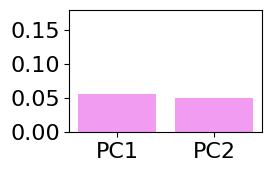

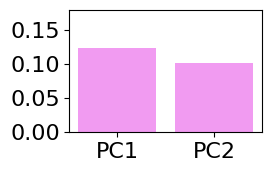

In [10]:
number_components = 2
plot_explained_variance_ratio(model_24_before_expl_var, number_components=number_components, component_label="PC", cum_sum=False, title=False, fig_output_path=None)
plot_explained_variance_ratio(model_24_after_expl_var, number_components=number_components, component_label="PC", cum_sum=False, title=False, fig_output_path=None)

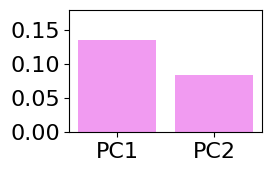

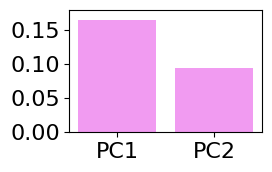

In [11]:
plot_explained_variance_ratio(model_36_before_expl_var, number_components=number_components, component_label="PC", cum_sum=False, title=False, fig_output_path=None)
plot_explained_variance_ratio(model_36_after_expl_var, number_components=number_components, component_label="PC", cum_sum=False, title=False, fig_output_path=None)

### PCA plotting

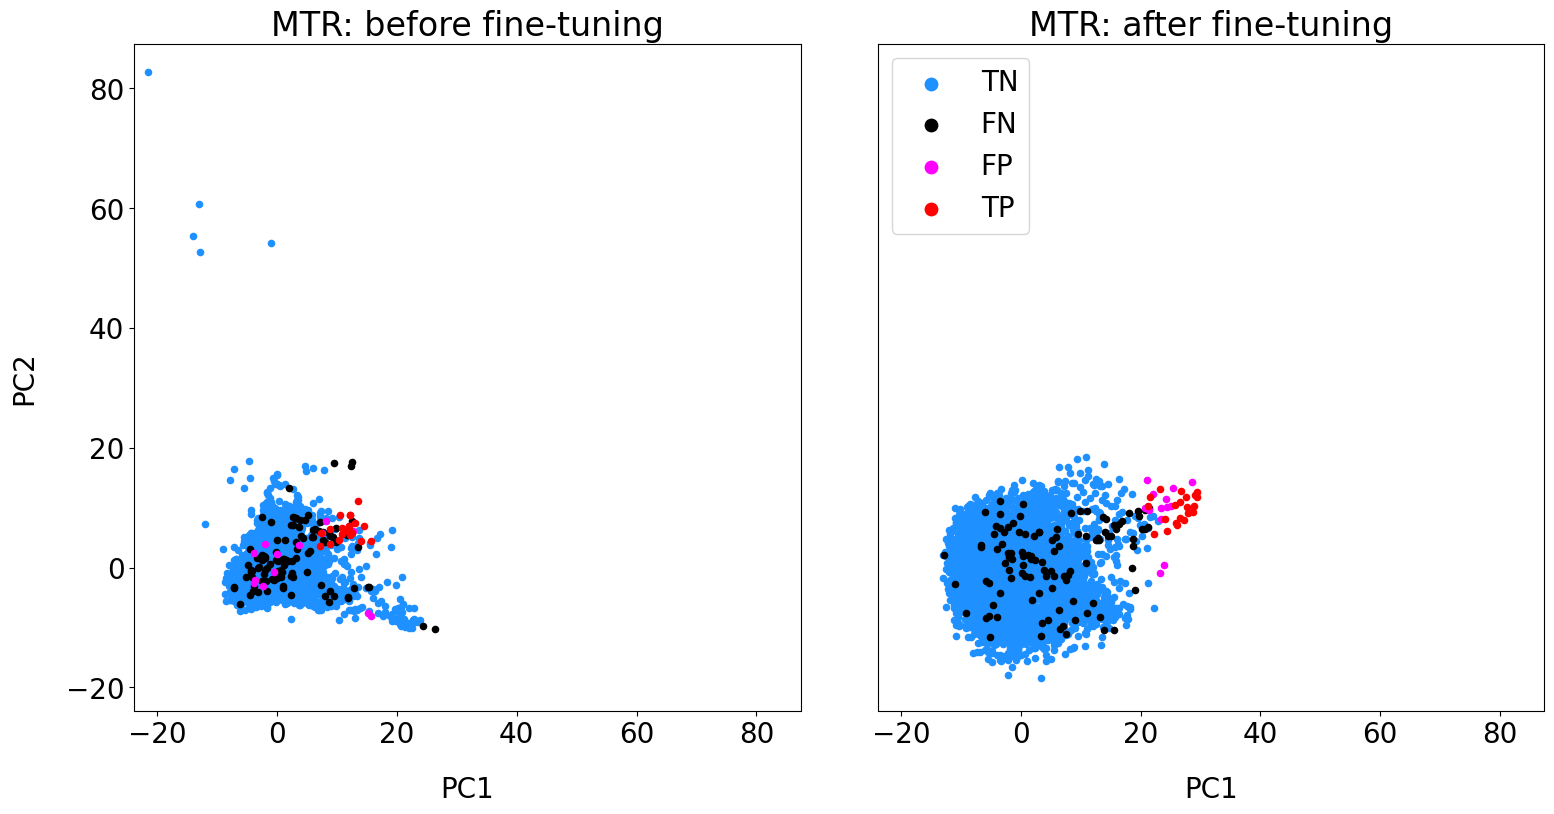

In [20]:
colors = ["dodgerblue", "black", "magenta", "red"]
titles = ['MTR: before fine-tuning', 'MTR: after fine-tuning']
plot_projection(dataframes=[model_24_before_PCA_df, model_24_after_PCA_df], class_column='cf', colors=colors, projection_dim=2, figure_title=None, plot_titles=titles, title_color='black', fig_output_path=None)

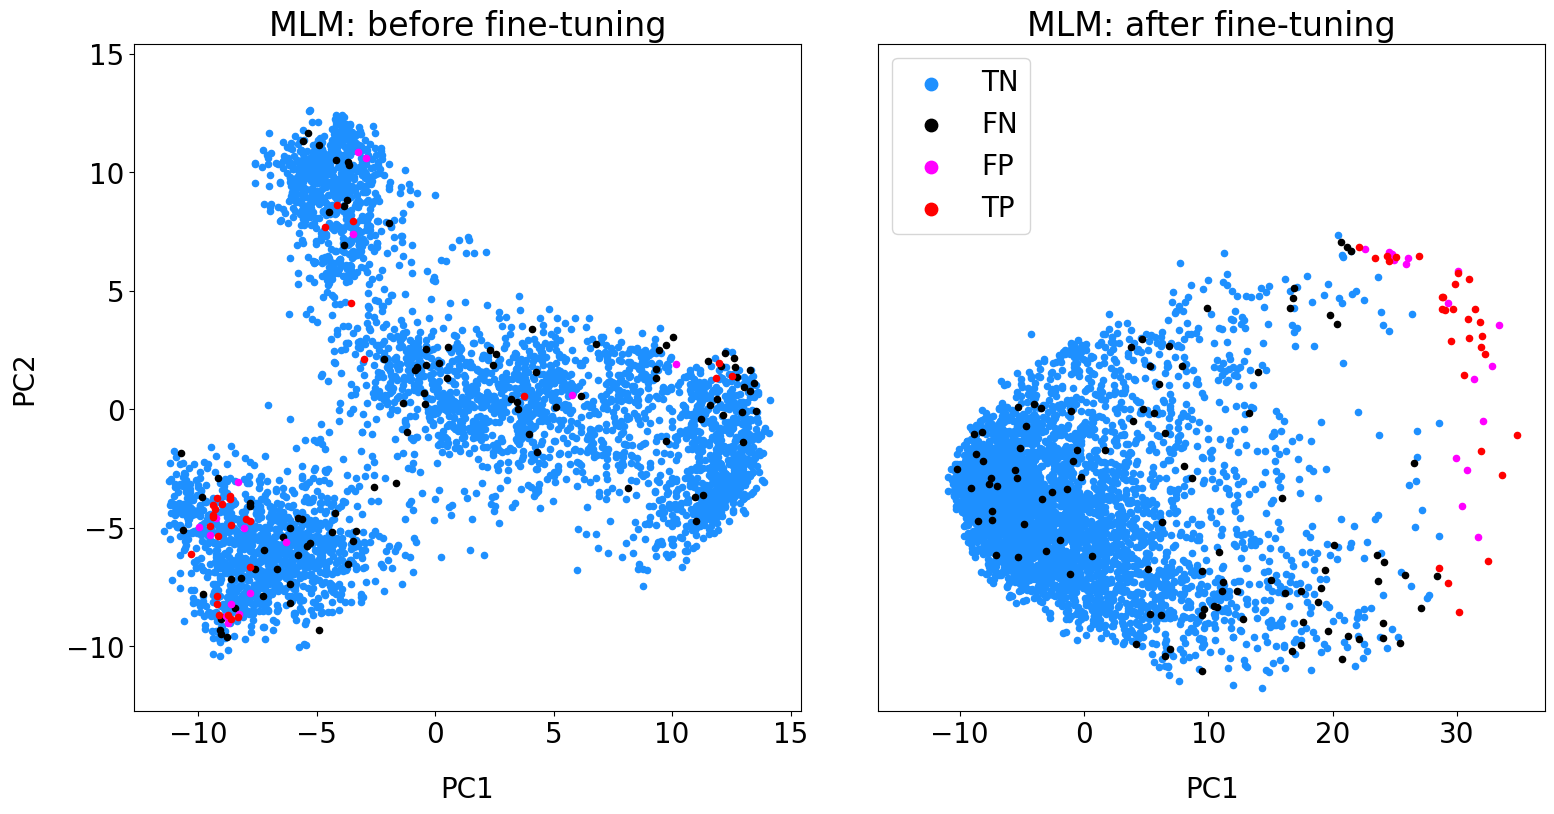

In [21]:
titles = ['MLM: before fine-tuning', 'MLM: after fine-tuning']
plot_projection(dataframes=[model_36_before_PCA_df, model_36_after_PCA_df], class_column='cf', colors=colors, projection_dim=2, figure_title=None, plot_titles=titles, title_color='black', fig_output_path=None)